## Discrete Cosine Transform

Constructing Fourier series with only cosine terms requires the function to be symmetric (since cosine is an even and hence, a symmetric function). But just as we can make any function periodic, we can also make it symmetric -- by mirroring the function over twice the interval, and repeating the whole thing endlessly. Thus, any function $f(x)$, can be expressed as a sum of cosine functions, where the coefficients of each term is given by:
$$
c_k = y_0 + y_{N/2}\cos\left(\frac{2\pi k(N/2)}{N}\right) + 2\sum_{n=1}^{(N/2) - 1} y_n\cos\left(\frac{2\pi kn}{N}\right)
$$
Due to forcing the function to be symmetric, the function always has even number of sample points, and hence, we can express the coefficients using the above expression. We can obtain the inverse transform as follows:
$$
y_n = \frac{1}{N} \left[c_0 + c_{N/2}\cos\left(\frac{2\pi n(N/2)}{N}\right) +2\sum_{k=1}^{(N/2)-1}c_k\cos\left(\frac{2\pi kn}{N}\right)\right]
$$
One major advantage of DCT over DFT is that, in DFT the function $f(x)$ is forced to be periodic, by forcing the first and last sample points to have the same value. This may create substantial discontinuities in the function. The DCT does not suffer from such problems, and is hence, preferred for functions that are not inherently periodic.  
Let us now compare the two.

### Download the file 'dow.txt' from the folder 'data_file' in the repository

This file contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

1024


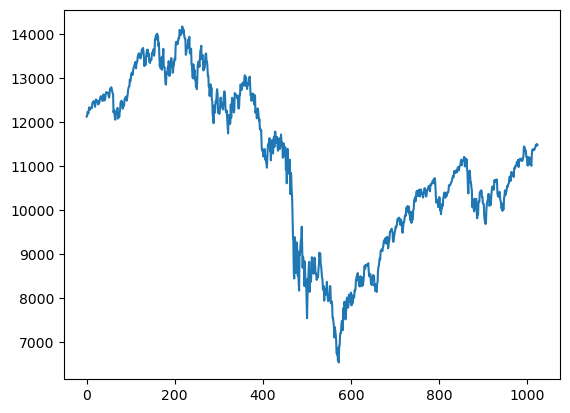

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft    # we have used fft and ifft before
# fft and ifft are more general, accepting complex sample points
# rfft and irfft accept only real sample points, which is generally true for problems in physics

data = np.loadtxt('dow.txt')
N    = data.shape[0]
print(N)

plt.plot(data,label='original')

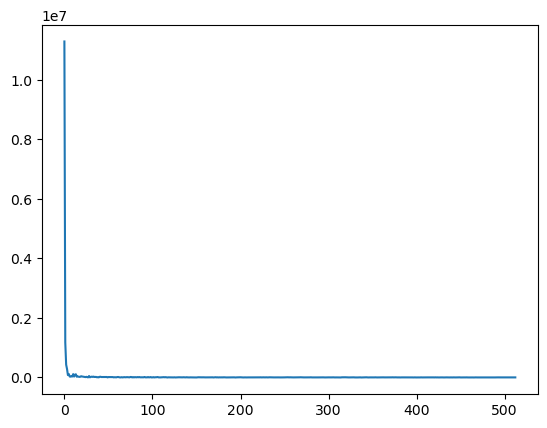

In [2]:
# rfft produces an array of (N/2)+1 complex numbers
c = rfft(data)   # obtaining all fourier coefficients

#plotting all coefficients
plt.figure()
plt.plot(abs(c))
plt.show()

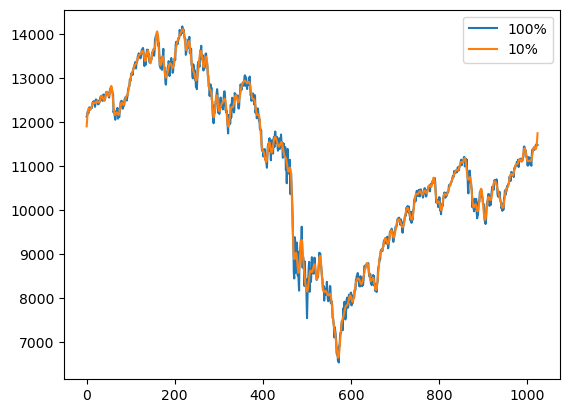

In [3]:
# inverse transform to get the original curve
y100 = irfft(c)
plt.plot(y100,label='100%')

c[N//10:] = 0   # keeping only the first 10% of the coefficients 
y10 = irfft(c)       # reconstructing signal using only first 10% of the coefficients
plt.plot(y10,label='10%')
plt.legend()

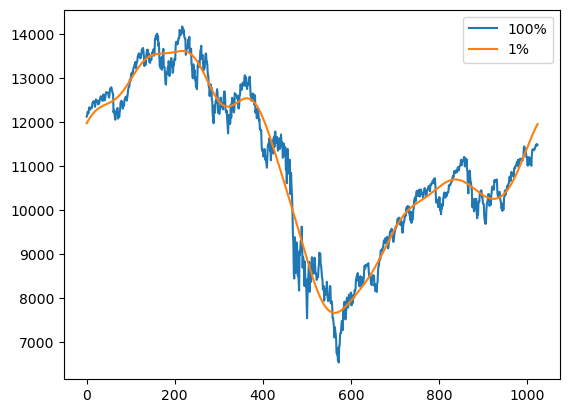

In [4]:
# try reconstructing with only first 1% of the coefficients
c[N//100:] = 0   # keeping only the first 1% of the coefficients 
y1  =  irfft(c)  # reconstructing signal using only first 1% of the coefficients

plt.plot(y100,label='100%')
plt.plot(y1,label='1%')
plt.legend()

The above process is also called 'smoothing'. By ignoring the secondary modes in the Fourier series, a more smooth profile is obtained for the function.

### Download the file 'dow2.txt' from the folder 'data_file' in the repository

This file has data on the Dow for a different time period, from 2004 to 2008.

1024


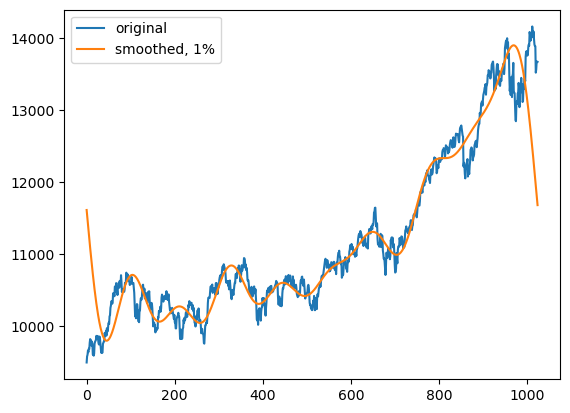

In [5]:
# plot and smooth the data
data2 = np.loadtxt('dow2.txt')
N    = data2.shape[0]
print(N)

plt.plot(data2,label='original')

c2 = rfft(data2) 
c2[N//100:] = 0
y_smooth = irfft(c2)
plt.plot(y_smooth,label='smoothed, 1%')
plt.legend()

What changes do you notice in the behavior of the curve from 'dow.txt' and 'dow2.txt'? Where do the curves not match anymore? Why not?

DFT requires the function to be periodic. This forces the first and last sample points to be the same. Hence, for non-periodic functions, the smoothed function does not match the original near the edges of the interval.

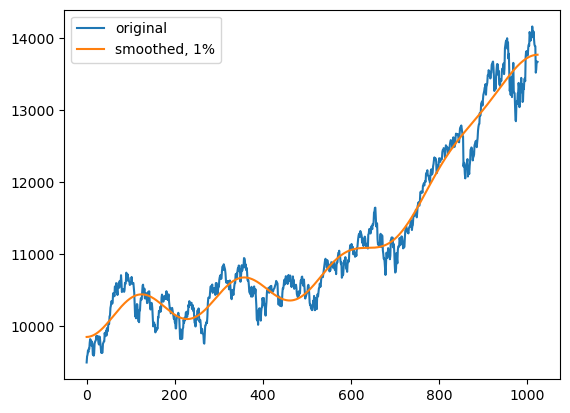

In [6]:
# implement DCT and inverse DCT for correct reconstruction

def dct(y):
    N = len(y)
    y2 = np.empty(2*N,float)    # array to hold mirrored (symmetric) function
    for n in range(N):
        y2[n] = y[n]
        y2[2*N - n -1] = y[n]
    c = rfft(y2)
    phi = np.exp(1j*np.pi*np.arange(N)/N)
    return np.real(c[:N]*phi)

def idct(a):
    N = len(a)
    c = np.empty(N+1,complex)

    phi = np.exp(1j*np.pi*np.arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]

plt.plot(data2,label='original')

c = dct(data2)
c[N//100:]=0
y = idct(c)
plt.plot(y,label='smoothed, 1%')
plt.legend()
plt.show()

### Technological Applications of DCT

* JPEG or Joint Photographic Experts Group -- works by dividing the pixels in an image into blocks, performing 2D Type II DCT on the blocks and then looking for coefficients $a_k$ that are small and can be ignored.
* MPEG -- compresses moving pictures, i.e. films or videos, in the same way.
* MP3 -- music or audio signal represented digitally as a set of equally spaced samples of an audio waveform.

# Try it yourself

### Total 4 marks

**Smoothing and filtering**: Download the file 'trumpet.txt' from the 'data_files' folder in the repository. It has the waveform of a single note played on a trumpet. Plot the waveform. Plot the magnitude of the Fourier coefficients. Use python's rfft (and irfft) functions. You may need to zoom-in (i.e. set xlim to a smaller range), since the dataset is quite large.  
Finally, overplot all modes that have Fourier coefficients with magnitude greater than $10^8$.

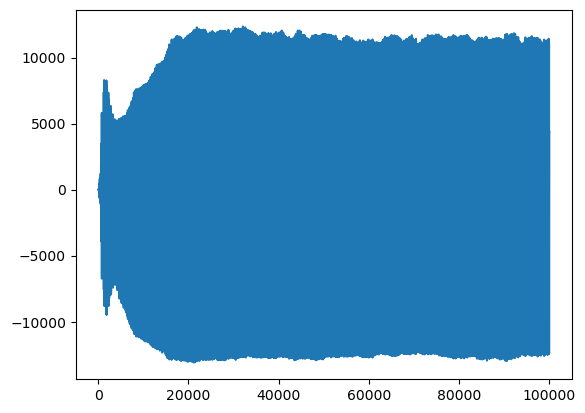

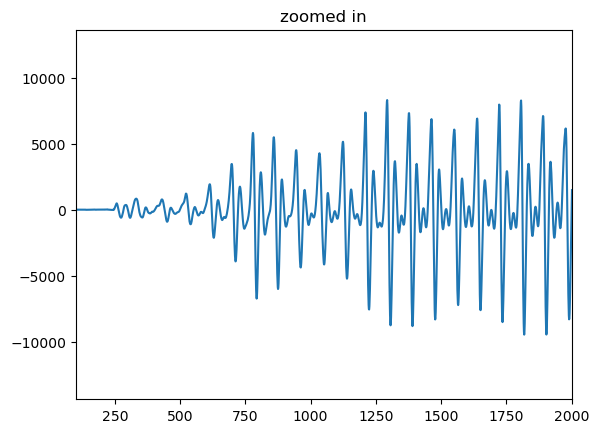

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft    # we have used fft and ifft before

# plot and smooth the data
data = np.loadtxt('trumpet.txt')
N    = data.shape[0]

plt.plot(data,label='original')
plt.show()

plt.plot(data,label='original')
plt.xlim(100,2000)
plt.title('zoomed in')
plt.show()

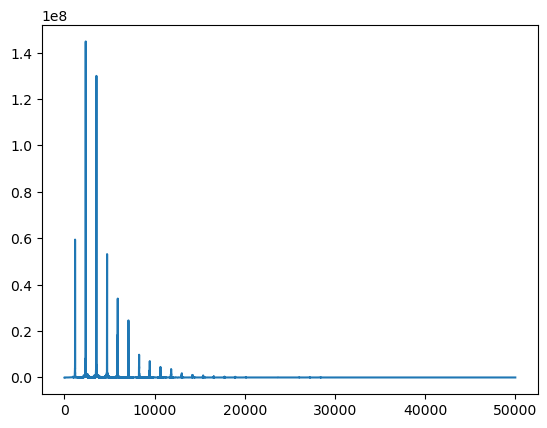

In [8]:
c = rfft(data) 
plt.plot(abs(c))
plt.show()

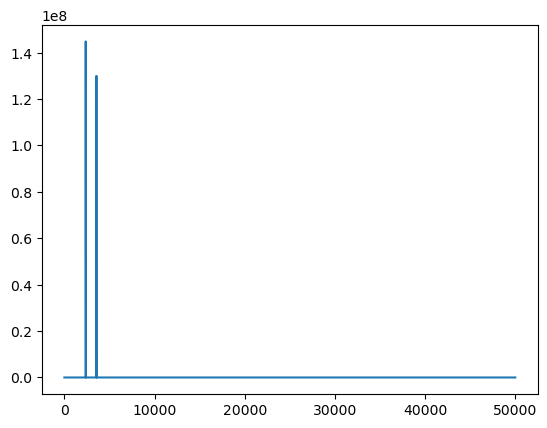

In [9]:
c[abs(c)<1e8] = 0
# keeping only modes with magnitudes higher than 10^8
plt.plot(abs(c))
plt.show()

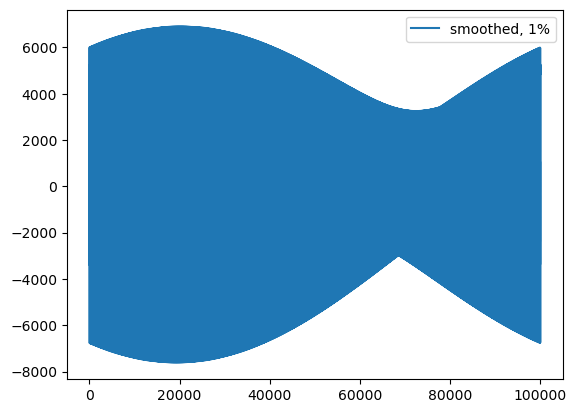

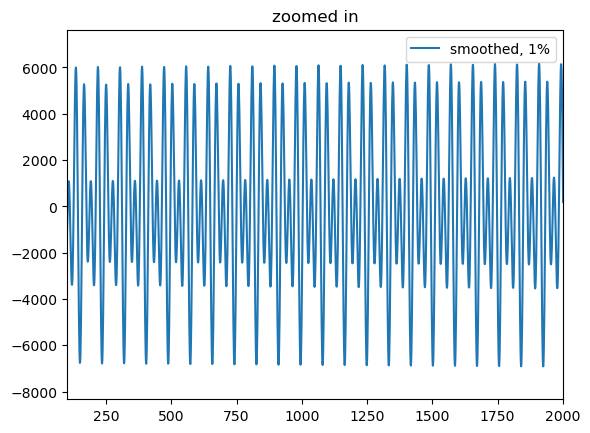

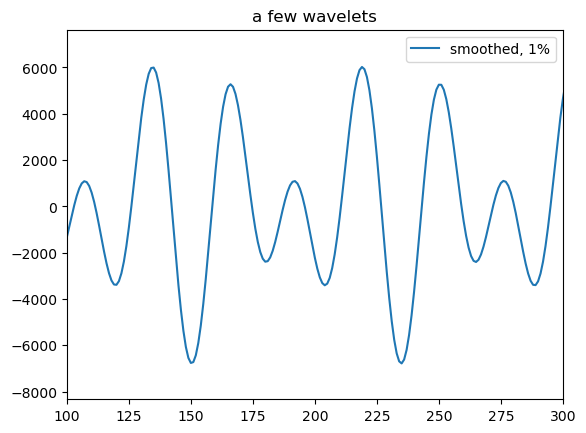

In [10]:
# reconstructing smoothed data
y_smooth = irfft(c)
plt.plot(y_smooth,label='smoothed, 1%')
plt.legend()
plt.show()

plt.plot(y_smooth,label='smoothed, 1%')
plt.xlim(100,2000)
plt.title('zoomed in')
plt.legend()
plt.show()

plt.plot(y_smooth,label='smoothed, 1%')
plt.xlim(100,300)
plt.title('a few wavelets')
plt.legend()